In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential
from keras.layers import Dense,Reshape,advanced_activations
import numpy as np
%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime

Using Theano backend.


In [2]:
# import keras.layers.advanced_activations.LeakyReLU(alpha=0.3) as LRELU



In [3]:
# fix random seed for reproducibility

np.random.seed(7)
mldf = pd.read_csv('mltest.csv', engine='python')

In [4]:


# dataset.columns
mldata= mldf.ix[:,[3,4,5,6,8,9,10,11,7]].copy()
# 星期轉換數字
mldata.replace(to_replace='Sun',value=6,inplace=True );mldata
mldata.replace(to_replace='Sat',value=5,inplace=True );mldata
mldata.replace(to_replace='Fri',value=4,inplace=True );mldata
mldata.replace(to_replace='Thu',value=3,inplace=True );mldata
mldata.replace(to_replace='Wed',value=2,inplace=True );mldata
mldata.replace(to_replace='Tue',value=1,inplace=True );mldata
mldata.replace(to_replace='Mon',value=0,inplace=True );mldata
mldata.columns = ['a','b','c','d','e','f','g','h','i']
mldata.c=pd.to_datetime(mldata.c);
mldata.c= mldata.c.dt.dayofyear;mldata
mldata.replace(to_replace='00:00:00',value=0,inplace=True );mldata
mldata.replace(to_replace='01:00:00',value=1,inplace=True );mldata
mldata.replace(to_replace='02:00:00',value=2,inplace=True );mldata
mldata.replace(to_replace='03:00:00',value=3,inplace=True );mldata
mldata.replace(to_replace='04:00:00',value=4,inplace=True );mldata
mldata.replace(to_replace='05:00:00',value=5,inplace=True );mldata
mldata.replace(to_replace='06:00:00',value=6,inplace=True );mldata
mldata.replace(to_replace='07:00:00',value=7,inplace=True );mldata
mldata.replace(to_replace='08:00:00',value=8,inplace=True );mldata
mldata.replace(to_replace='09:00:00',value=9,inplace=True );mldata
mldata.replace(to_replace='10:00:00',value=10,inplace=True );mldata
mldata.replace(to_replace='11:00:00',value=11,inplace=True );mldata
mldata.replace(to_replace='12:00:00',value=12,inplace=True );mldata
mldata.replace(to_replace='13:00:00',value=13,inplace=True );mldata
mldata.replace(to_replace='14:00:00',value=14,inplace=True );mldata
mldata.replace(to_replace='15:00:00',value=15,inplace=True );mldata
mldata.replace(to_replace='16:00:00',value=16,inplace=True );mldata
mldata.replace(to_replace='17:00:00',value=17,inplace=True );mldata
mldata.replace(to_replace='18:00:00',value=18,inplace=True );mldata
mldata.replace(to_replace='19:00:00',value=19,inplace=True );mldata
mldata.replace(to_replace='20:00:00',value=20,inplace=True );mldata
mldata.replace(to_replace='21:00:00',value=21,inplace=True );mldata
mldata.replace(to_replace='22:00:00',value=22,inplace=True );mldata
mldata.replace(to_replace='23:00:00',value=23,inplace=True );mldata
mldata.replace(to_replace='東',value=1,inplace=True );mldata


mlva = mldata.values
mlva = mlva.astype('float64')

train_size = int(len(mlva) * 0.67)
test_size = len(mlva) - train_size
train, test = mlva[0:train_size,:], mlva[train_size:len(mlva),:]

# convert an array of values into a dataset matrix
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        a = dataset[i, 0:8]
        dataX.append(a)
        dataY.append(dataset[i , 8])
#     return dataX,dataY
    return numpy.array(dataX), numpy.array(dataY)



# 第二種寫法
# def create_dataset(dataset):
#     dataX, dataY = [], []
#     dataX.append(dataset[:,0:8])
#     dataY.append(dataset[:,8])
# #     return numpy.array(dataX), numpy.array(dataY)
#     return dataX,dataY
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

train[0],trainX[0],trainY[0]
#第一種寫法
# trainX, trainY = [],[]

# trainX.append(train[:,0:8])
# trainY.append(train[:,8])

# testX, testY = [],[]
# testX.append(test[:,0:8])
# testY.append(test[:,8])



# # create and fit Multilayer Perceptron model
# model = Sequential()

# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, init='uniform', activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=0)


# # Estimate model performance
# trainScore = model.evaluate(trainX, trainY, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
# testScore = model.evaluate(testX, testY, verbose=0)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

# # shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(mlva)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[:len(trainPredict), :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(mlva)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict):len(mlva), :] = testPredict

# len(trainPredict),len(mlva),len(testPredict)


# # plot baseline and predictions
# plt.plot(mlva[:,-1])
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

NameError: global name 'numpy' is not defined

(977, 482)
(840, 336)
Train Score: 1434.05 MSE (37.87 RMSE)
Test Score: 98666.19 MSE (314.11 RMSE)


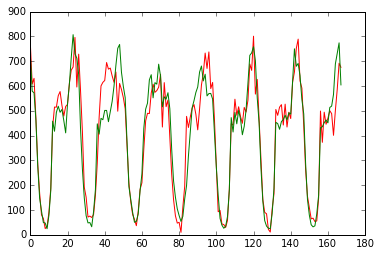

In [44]:

np.random.seed(7)
mldf = pd.read_csv('mltest.csv', engine='python')


mltt = mldf.ix[:,[3,4,5,6,8,9,10,7]].copy()
mltt.columns = ['a','b','c','d','e','f','g','h'];mltt
mltt.replace(to_replace='東',value=1,inplace=True );mltt
mltt.c=pd.to_datetime(mltt.c);
mltt.c = pd.to_datetime(mltt.c);
mltt['weekday'] = mltt['c'].dt.dayofweek;mltt
mltt.c= mltt.c.dt.dayofyear;mltt
mltt.replace(to_replace='00:00:00',value=0,inplace=True );mltt
mltt.replace(to_replace='01:00:00',value=1,inplace=True );mltt
mltt.replace(to_replace='02:00:00',value=2,inplace=True );mltt
mltt.replace(to_replace='03:00:00',value=3,inplace=True );mltt
mltt.replace(to_replace='04:00:00',value=4,inplace=True );mltt
mltt.replace(to_replace='05:00:00',value=5,inplace=True );mltt
mltt.replace(to_replace='06:00:00',value=6,inplace=True );mltt
mltt.replace(to_replace='07:00:00',value=7,inplace=True );mltt
mltt.replace(to_replace='08:00:00',value=8,inplace=True );mltt
mltt.replace(to_replace='09:00:00',value=9,inplace=True );mltt
mltt.replace(to_replace='10:00:00',value=10,inplace=True );mltt
mltt.replace(to_replace='11:00:00',value=11,inplace=True );mltt
mltt.replace(to_replace='12:00:00',value=12,inplace=True );mltt
mltt.replace(to_replace='13:00:00',value=13,inplace=True );mltt
mltt.replace(to_replace='14:00:00',value=14,inplace=True );mltt
mltt.replace(to_replace='15:00:00',value=15,inplace=True );mltt
mltt.replace(to_replace='16:00:00',value=16,inplace=True );mltt
mltt.replace(to_replace='17:00:00',value=17,inplace=True );mltt
mltt.replace(to_replace='18:00:00',value=18,inplace=True );mltt
mltt.replace(to_replace='19:00:00',value=19,inplace=True );mltt
mltt.replace(to_replace='20:00:00',value=20,inplace=True );mltt
mltt.replace(to_replace='21:00:00',value=21,inplace=True );mltt
mltt.replace(to_replace='22:00:00',value=22,inplace=True );mltt
mltt.replace(to_replace='23:00:00',value=23,inplace=True );mltt


cols =mltt.columns.tolist()
mltt= mltt[cols[:3]+cols[-1:]+cols[3:-1]];mltt
mltt.columns = ['a','b','c','d','e','f','g','h','i'];mltt

""" mltt['datetime']= mltt['c'] +' '+ mltt['d'];mltt
 mltt =mltt.drop('c',1);mltt
 mltt =mltt.drop('d',1);mltt
 mltt['datetime'] = mltt.datetime.astype('int64') //10**9;mltt"""




mlttva = mltt.values
mlttva = mlttva.astype('float32')


train_size = int(len(mlttva) * 0.67)
test_size = len(mlttva) - train_size
train, test = mlttva[0:train_size,:], mlttva[train_size:len(mlttva),:]

print(len(train), len(test))

"""
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:9]
        if len(dataY) == (len(dataset)/look_back)-look_back+1:
#             print len(dataY),(len(dataset)/look_back)-1
            dataX.append(a)
            dataY.append(dataset[i + look_back:i+look_back+look_back, 8])
            break
        else:
            dataX.append(a)
            dataY.append(dataset[i + look_back:i+look_back+look_back, 8])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)
    
"""

"""
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:9]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, 8])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)
"""

"""
0125
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:9]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, 8])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)
"""




# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:9]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, 8])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)




    

look_back = 168

train = train[:-(len(train)%look_back)]
test = test[:-(len(test)%look_back)]

print(len(train), len(test))



trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# print len(trainX[0][0])

# print trainY,len(trainY)

# trainX=trainX.reshape((len(train)/look_back),9*look_back)
# trainY =trainY.reshape(len(train),)
# testX=testX.reshape((len(test)/look_back),9*look_back)
# testY =testY.reshape(len(test),look_back)


# print len(trainY)

# create and fit Multilayer Perceptron model
model = Sequential()

# RESHAPE is  working !!!!! >0<"
model.add(Reshape((look_back*9,), input_shape=(look_back,9)))
model.add(Dense(190,input_dim=(look_back*9), activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(look_back))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, nb_epoch=150, batch_size=2, verbose=0)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

trainPredict = model.predict(trainX)

testPredict = model.predict(testX)

# Jackie veriosn plot

pre = testPredict.reshape(len(testPredict)*len(testPredict[0]),)

ori = testY.reshape(len(testY)*len(testY[0]),)

# print len(testY),len(testX)
# print testY,testX
# print pre
# print ori

plt.plot(pre3,color='r')
plt.plot(ori,color='g')
plt.show()



# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(mlttva)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[:len(trainPredict), :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(mlttva)
# testPredictPlot[:, :] = np.nan
# # len(trainPredict),len(mlva),len(testPredict)

# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(mlttva)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(mlttva[:,-1])

# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()



In [43]:
pre2= pre.tolist()
pre3 = pre2[-5:]+pre2[:-5]


pre3

[772.7188720703125,
 608.2077026367188,
 630.8426513671875,
 469.873291015625,
 285.45098876953125,
 168.52137756347656,
 80.64025115966797,
 66.14347076416016,
 25.06922149658203,
 33.691673278808594,
 90.86634826660156,
 188.35284423828125,
 435.5066833496094,
 515.1456909179688,
 514.5910034179688,
 560.6417846679688,
 577.5526733398438,
 521.5338745117188,
 478.8882141113281,
 517.404541015625,
 525.8436889648438,
 611.3158569335938,
 663.9898071289062,
 676.5596923828125,
 795.759521484375,
 595.9261474609375,
 728.3309936523438,
 580.0408935546875,
 415.17620849609375,
 192.162353515625,
 151.57894897460938,
 71.53166961669922,
 75.51553344726562,
 69.76698303222656,
 81.46878051757812,
 159.6866455078125,
 289.2098693847656,
 474.4907531738281,
 600.2998046875,
 614.7276611328125,
 622.2862548828125,
 694.6954345703125,
 668.06787109375,
 672.1693725585938,
 640.6315307617188,
 614.9733276367188,
 656.3416748046875,
 498.38397216796875,
 610.3778686523438,
 585.9234008789062,
 5

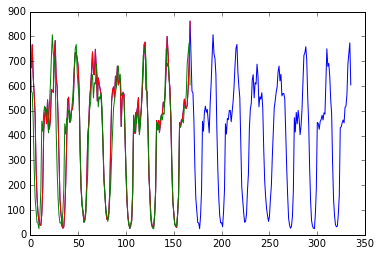

In [30]:
# print testX[0][:,-1],ori,test[:,-1]



plt.plot(test[:,-1],color='b')
plt.plot(testX[0][:,-1],color='r')
plt.plot(ori,color= 'g')


In [145]:
test = pd.read_csv('realtet.csv',header=None, engine='python')
res = pd.read_csv('realresult.csv',header=None, engine='python')

testva = np.array([clean(test)])
resva = np.array([clean(res)])

In [149]:
# print len(testva)
# print len(resva)

print type(testX)
print type(testva)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [1]:
# resva[0][:,-1]

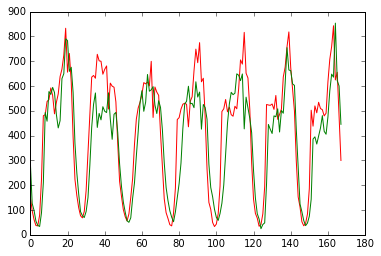

In [169]:
testvapre= model.predict(testva)
prett = testvapre.reshape(len(testvapre)*len(testvapre[0]),)
plt.plot(prett,color='r')
plt.plot(resva[0][:,-1],color='g')
plt.show()

In [92]:
def clean(inp):
    outp = inp.ix[:,[3,4,5,6,8,9,10,7]].copy()
    outp.columns = ['a','b','c','d','e','f','g','h'];outp
    outp.replace(to_replace='東',value=1,inplace=True );outp
    outp.c=pd.to_datetime(outp.c);
    outp.c = pd.to_datetime(outp.c);
    outp['weekday'] = outp['c'].dt.dayofweek;outp
    outp.c= outp.c.dt.dayofyear;outp
    outp.replace(to_replace='00:00:00',value=0,inplace=True );outp
    outp.replace(to_replace='01:00:00',value=1,inplace=True );outp
    outp.replace(to_replace='02:00:00',value=2,inplace=True );outp
    outp.replace(to_replace='03:00:00',value=3,inplace=True );outp
    outp.replace(to_replace='04:00:00',value=4,inplace=True );outp
    outp.replace(to_replace='05:00:00',value=5,inplace=True );outp
    outp.replace(to_replace='06:00:00',value=6,inplace=True );outp
    outp.replace(to_replace='07:00:00',value=7,inplace=True );outp
    outp.replace(to_replace='08:00:00',value=8,inplace=True );outp
    outp.replace(to_replace='09:00:00',value=9,inplace=True );outp
    outp.replace(to_replace='10:00:00',value=10,inplace=True );outp
    outp.replace(to_replace='11:00:00',value=11,inplace=True );outp
    outp.replace(to_replace='12:00:00',value=12,inplace=True );outp
    outp.replace(to_replace='13:00:00',value=13,inplace=True );outp
    outp.replace(to_replace='14:00:00',value=14,inplace=True );outp
    outp.replace(to_replace='15:00:00',value=15,inplace=True );outp
    outp.replace(to_replace='16:00:00',value=16,inplace=True );outp
    outp.replace(to_replace='17:00:00',value=17,inplace=True );outp
    outp.replace(to_replace='18:00:00',value=18,inplace=True );outp
    outp.replace(to_replace='19:00:00',value=19,inplace=True );outp
    outp.replace(to_replace='20:00:00',value=20,inplace=True );outp
    outp.replace(to_replace='21:00:00',value=21,inplace=True );outp
    outp.replace(to_replace='22:00:00',value=22,inplace=True );outp
    outp.replace(to_replace='23:00:00',value=23,inplace=True );outp
    cols =outp.columns.tolist()
    outp= outp[cols[:3]+cols[-1:]+cols[3:-1]];outp
    outp.columns = ['a','b','c','d','e','f','g','h','i'];outp
    outpp = outp.values
    outpp = outpp.astype('float32')
    return outpp
    

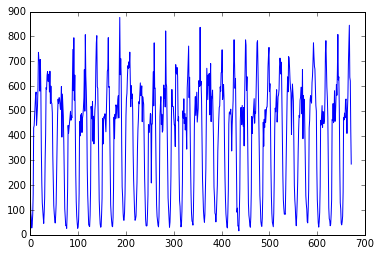

In [155]:

pre = trainPredict.reshape(len(trainPredict)*len(trainPredict[0]),)

ori = trainY.reshape(len(trainY)*len(trainY[0]),)


# print see
# print trainY[0]
# print trainY[1]
# print trainY[2]
# print trainY[3]

# plt.plot(pre,color = 'r')
plt.plot(ori,color = 'b')
plt.show()